In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Stałe i konwersje jednostek
E_H = 27.211
E_CONV = E_H * 1000
D_CONV = 0.05292
F_CONV = E_H / D_CONV / 1e-4



In [7]:
# Parametry systemu
n = 101
mass = 0.067
a = 25 / D_CONV  # [nm] -> [au]
d1 = 12 / D_CONV  # [nm] -> [au]
d2 = 4 / D_CONV  # [nm] -> [au]
dx = 2 * a / (n + 1)
alpha = 1 / (2 * mass * dx ** 2)



In [8]:
# Funkcje pomocnicze
def V_potential(x):
    """Potencjał V_w(x)"""
    if x < -d1:
        return 250 / E_CONV
    elif -d2 <= x <= d2:
        return 200 / E_CONV
    elif x > d1:
        return 250 / E_CONV
    else:
        return 0

def apply_hop(Psi, tm=0):
    """Zastosowanie operatora Hop"""
    psi_new = np.zeros(Psi.size, dtype=complex)
    for i in range(n):
        if i == 0:
            psi_new[i] = -alpha * (Psi[i + 1] - 2 * Psi[i]) + V_potential(xi[i]) * Psi[i]
        elif i == n - 1:
            psi_new[i] = -alpha * (-2 * Psi[i] + Psi[i - 1]) + V_potential(xi[i]) * Psi[i]
        else:
            psi_new[i] = -alpha * (Psi[i + 1] + Psi[i - 1] - 2 * Psi[i]) + V_potential(xi[i]) * Psi[i]
    return psi_new

def normalize_1d(psi):
    """Normalizacja funkcji falowej"""
    return psi / np.sqrt(np.sum(np.abs(psi) ** 2) * dx)


In [9]:
# Obliczanie wartości własnych i wektorów własnych
H_mat = np.zeros((n, n))
xi = np.linspace(-a, a, n)
for i in range(n):
    H_mat[i, i] = 2 * alpha + V_potential(xi[i])
    if i > 0:
        H_mat[i - 1, i] = -alpha
        H_mat[i, i - 1] = -alpha

eigvals, eigvecs = eigh(H_mat)
Psi_base = normalize_1d(eigvecs[:, 0])


In [10]:
# Generowanie danych dla pierwszego stanu w czasie
dt = 1
m = 0
tm = dt * m
Psi_k = Psi_base.copy()
Psi_prim = np.zeros(n, dtype=complex)
for j in range(10):
    Psi_prim = apply_hop(Psi_base, tm) + apply_hop(Psi_k, tm + dt)
    for i in range(n):
        Psi_k[i] = Psi_base[i] + dt / (2.0j) * Psi_prim[i]


/tmp/ipykernel_4368/2405925859.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  Psi_k[i] = Psi_base[i] + dt / (2.0j) * Psi_prim[i]


<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_4368/1841419324.py:7: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('$\Psi(x, t=0)$')


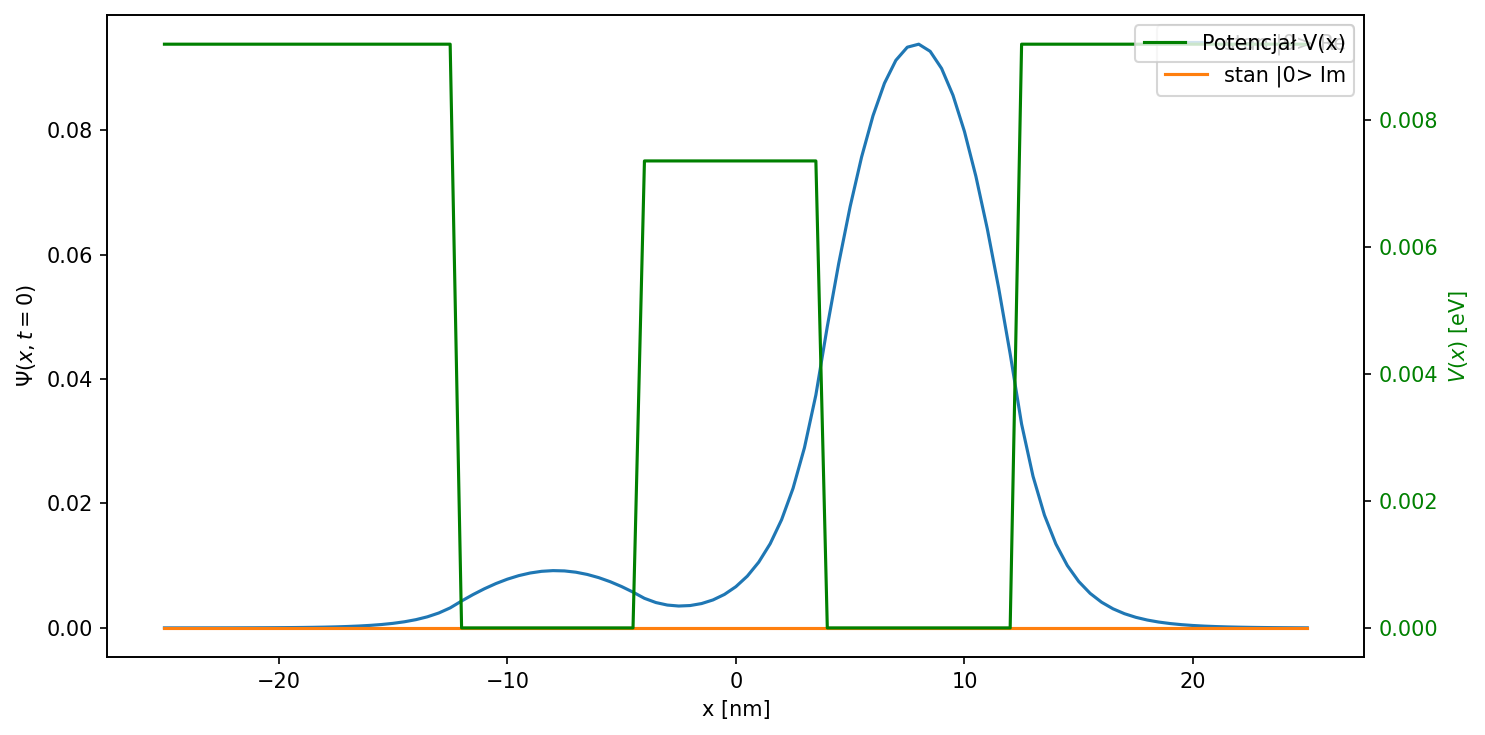

In [11]:
# Tworzenie wykresu
plt.figure(figsize=(10, 5), dpi=150)

plt.plot(xi * D_CONV, np.real(normalize_1d(Psi_k)), label='stan |0> Re')
plt.plot(xi * D_CONV, np.imag(normalize_1d(Psi_k)), label='stan |0> Im')
plt.xlabel('x [nm]')
plt.ylabel('$\Psi(x, t=0)$')
plt.legend()

# Dodanie osi dla potencjału na drugą stronę
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(xi * D_CONV, [V_potential(x) for x in xi], color='green', label='Potencjał V(x)')
ax2.set_ylabel('$V(x)$ [eV]', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
